# EDA
This is the Exploratory data analysis section

# Missing data analysis

In [1]:
import pandas as pd
from src_eda import MissingDataAnalyzer
from src_eda import CategoricalEDA
from src_eda import DateTimeProcessor
from src_eda import OpenAIEmbedding, EmbeddingProcessor

%load_ext autoreload
%autoreload 2



In [2]:
df = pd.read_excel("../data/raw_data/Question-Answer_dataset.xlsx")

# getting the duration
datetime_processor = DateTimeProcessor(df, 'Date_Time_Open', 'Date_Time_Closed')

# Process the dataframe to add Duration, Day_of_Week, Week_Number, and Month
df = datetime_processor.process_all()

# Display the updated dataframe
df.head()




,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer/Solution,Duration,Day_of_Week,Week_Number,Month,Year
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,Tuesday,26,June,2023
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,Thursday,23,June,2023
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,Monday,10,March,2023
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,Sunday,5,February,2023
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,Tuesday,11,March,2023


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           50 non-null     object        
 1   Requester_Type    50 non-null     object        
 2   Product           50 non-null     object        
 3   Indication        50 non-null     object        
 4   Question          48 non-null     object        
 5   Channel           50 non-null     object        
 6   Date_Time_Open    50 non-null     datetime64[ns]
 7   Date_Time_Closed  50 non-null     datetime64[ns]
 8   Answer/Solution   46 non-null     object        
 9   Duration          50 non-null     float64       
 10  Day_of_Week       50 non-null     object        
 11  Week_Number       50 non-null     UInt32        
 12  Month             50 non-null     object        
 13  Year              50 non-null     int32         
dtypes: UInt32(1), datetime64[ns]

In [4]:
df.columns

Index(['Country', 'Requester_Type', 'Product', 'Indication', 'Question',
       'Channel', 'Date_Time_Open', 'Date_Time_Closed', 'Answer/Solution',
       'Duration', 'Day_of_Week', 'Week_Number', 'Month', 'Year'],
      dtype='object')

Missing Data Summary:
 Question           2
Answer/Solution    4
dtype: int64


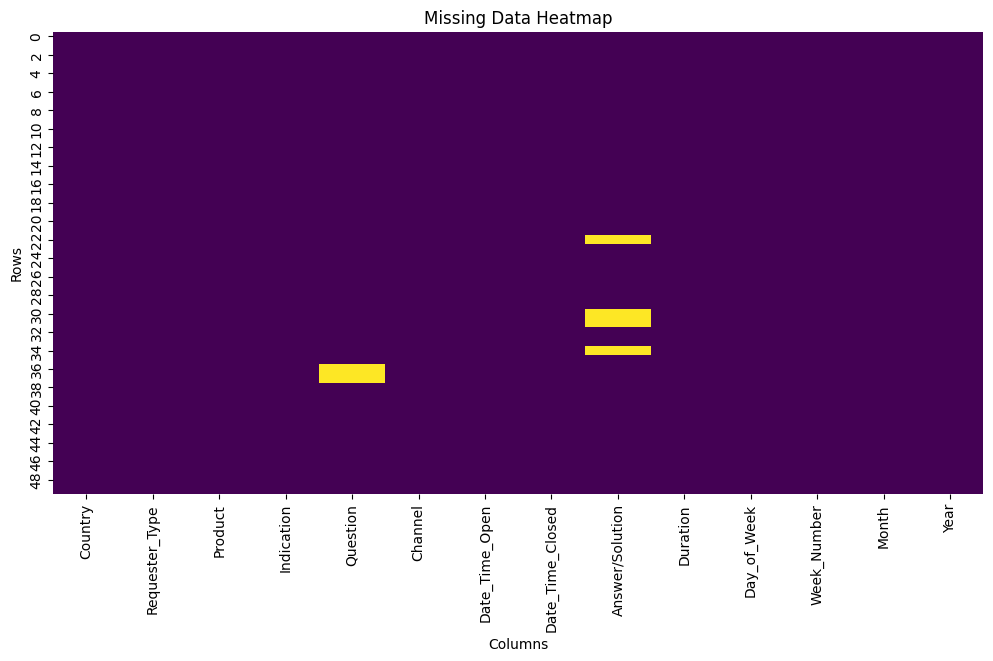

In [5]:
missing_data_analyzer = MissingDataAnalyzer(df)
missing_data_analyzer.analyze_missing_data()


# categorical variables

In [6]:

categorical_eda = CategoricalEDA(df)


print(categorical_eda.frequency_counts('Country'))
print(categorical_eda.frequency_counts('Requester_Type'))
print(categorical_eda.frequency_counts('Product'))
print(categorical_eda.frequency_counts('Indication'))
print(categorical_eda.frequency_counts('Channel'))
print(categorical_eda.frequency_counts('Day_of_Week'))
print(categorical_eda.frequency_counts('Week_Number'))
print(categorical_eda.frequency_counts('Month'))



Country
UK        20
US        15
Canada    15
Name: count, dtype: int64
Requester_Type
HCP           19
Pharmacist    16
Researcher    15
Name: count, dtype: int64
Product
Keytruda    50
Name: count, dtype: int64
Indication
NSCLC    50
Name: count, dtype: int64
Channel
call     30
email    20
Name: count, dtype: int64
Day_of_Week
Friday       12
Tuesday      11
Thursday      7
Monday        7
Sunday        6
Wednesday     4
Saturday      3
Name: count, dtype: int64
Week_Number
21    4
18    4
20    4
3     3
12    3
23    3
9     3
4     3
13    3
17    2
11    2
1     2
10    2
14    2
26    2
2     1
8     1
24    1
15    1
7     1
19    1
5     1
6     1
Name: count, dtype: Int64
Month
May         13
March       12
January      9
June         6
April        6
February     4
Name: count, dtype: int64


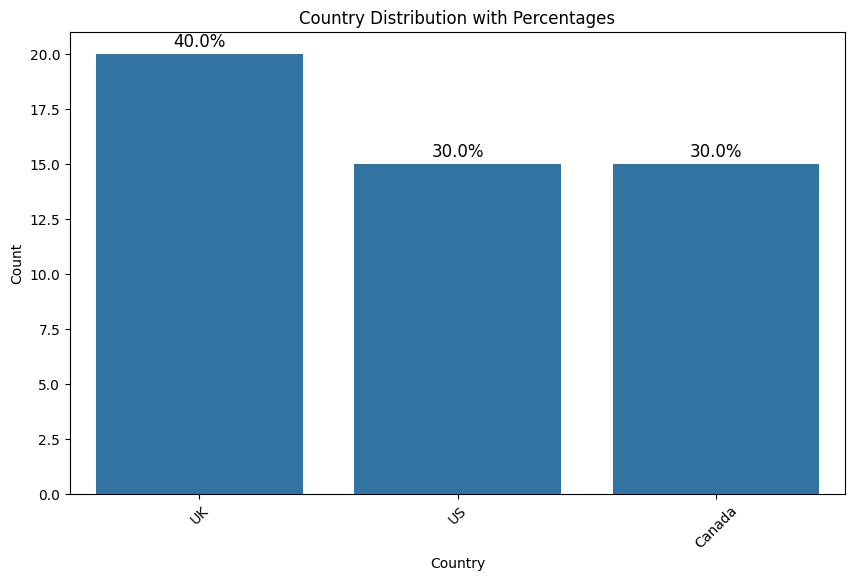

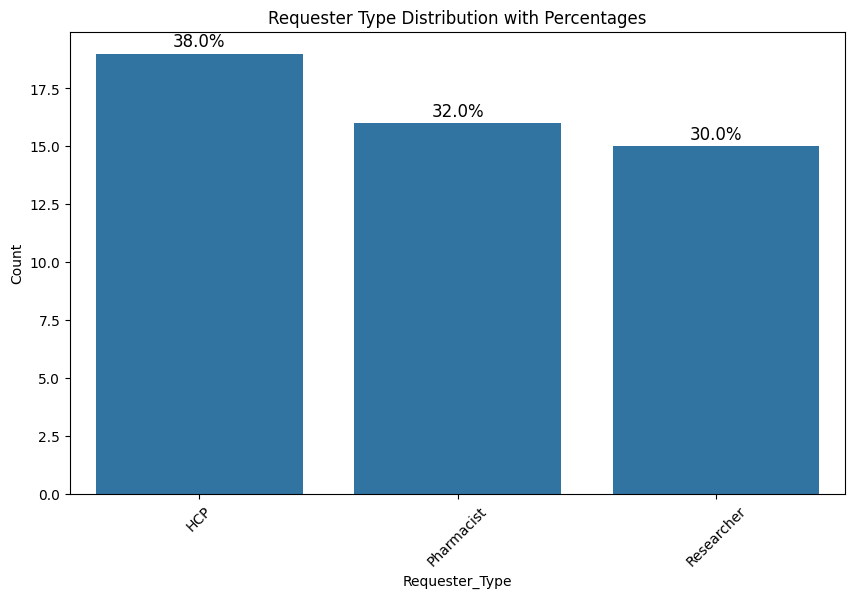

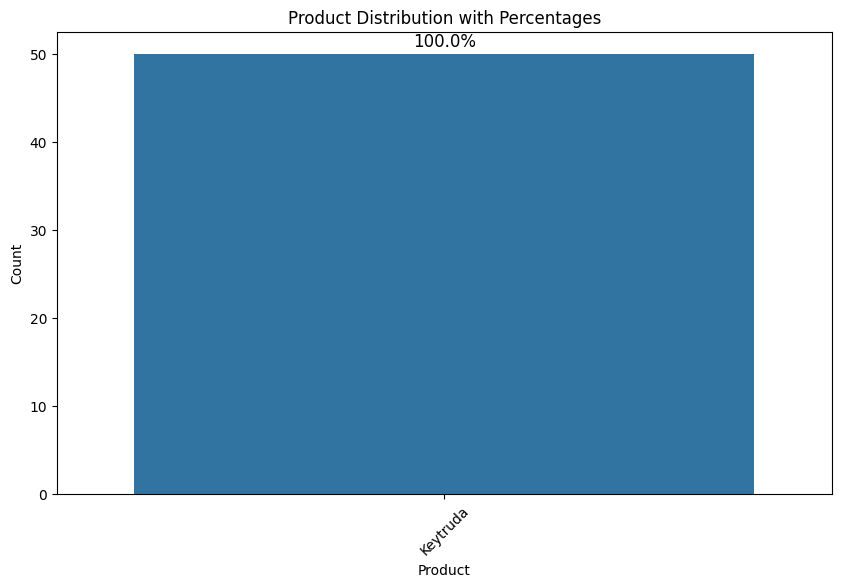

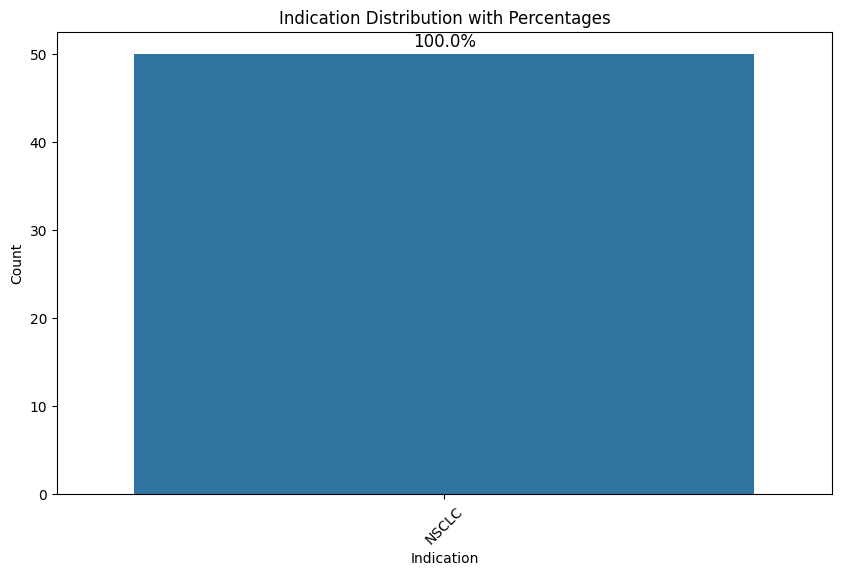

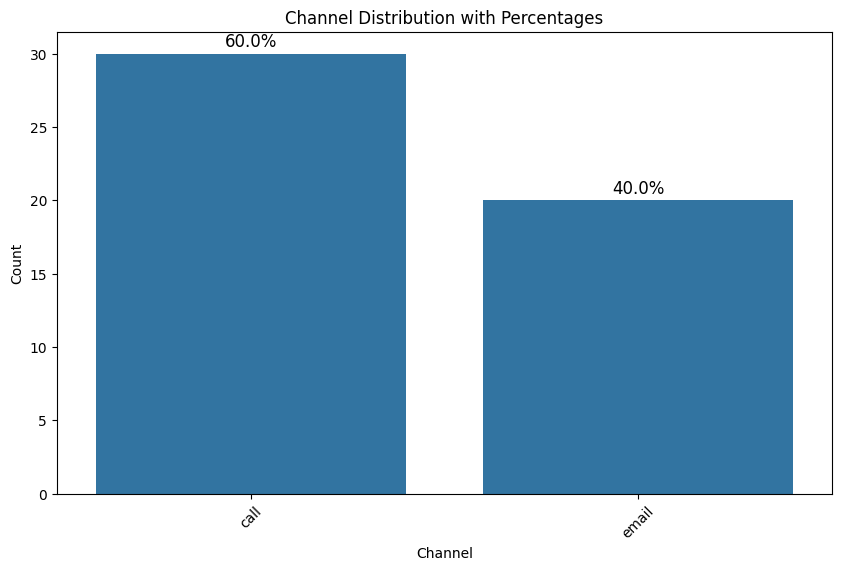

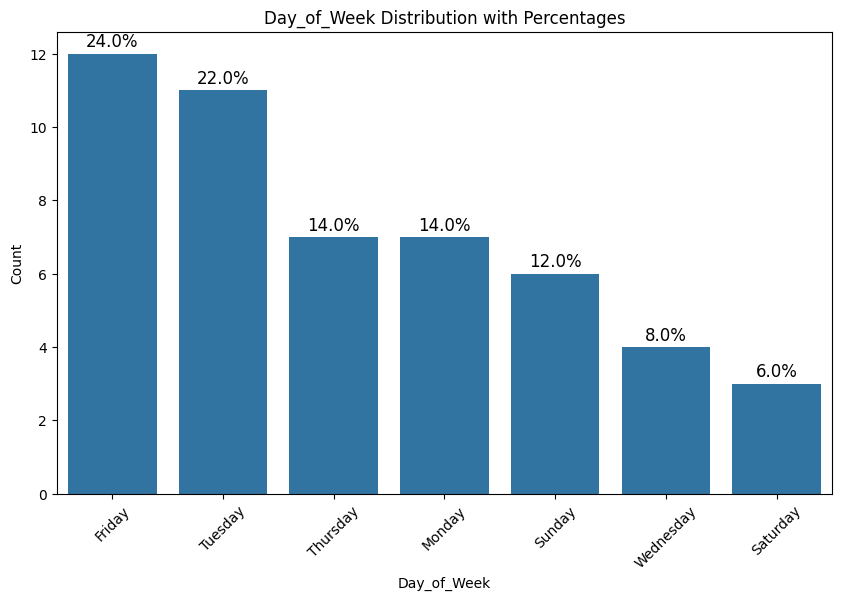

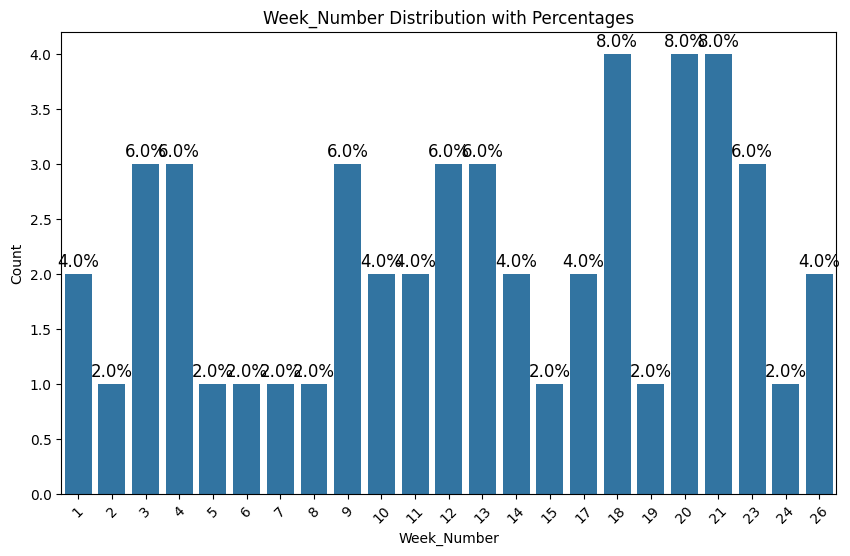

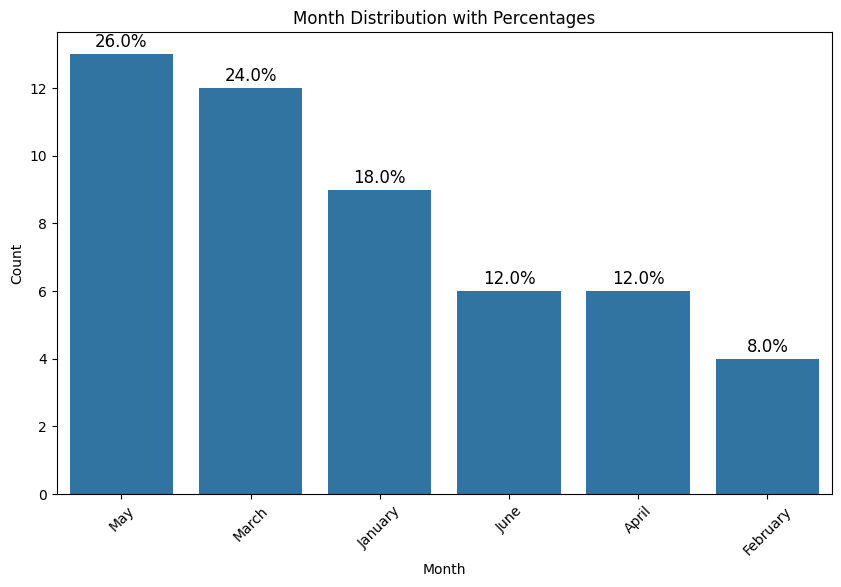

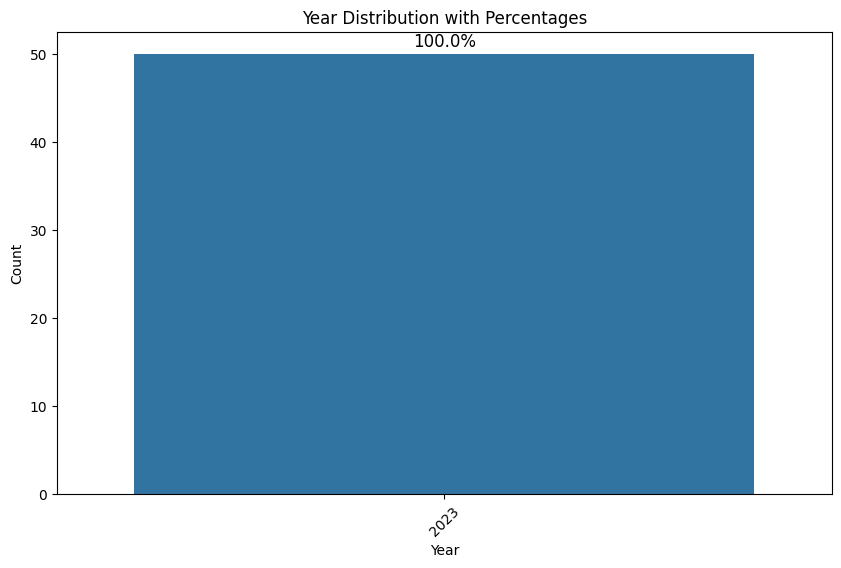

In [7]:
# 2. Bar Chart for each categorical variable
categorical_eda.plot_bar_chart('Country', title='Country Distribution with Percentages')
categorical_eda.plot_bar_chart('Requester_Type', title='Requester Type Distribution with Percentages')
categorical_eda.plot_bar_chart('Product', title='Product Distribution with Percentages')
categorical_eda.plot_bar_chart('Indication', title='Indication Distribution with Percentages')
categorical_eda.plot_bar_chart('Channel', title='Channel Distribution with Percentages')
categorical_eda.plot_bar_chart('Day_of_Week', title='Day_of_Week Distribution with Percentages')
categorical_eda.plot_bar_chart('Week_Number', title='Week_Number Distribution with Percentages')
categorical_eda.plot_bar_chart('Month', title='Month Distribution with Percentages')
categorical_eda.plot_bar_chart('Year', title='Year Distribution with Percentages')



In [8]:
# Define the list of categorical variables
categorical_vars = ['Country', 'Requester_Type', 'Product', 'Indication', 'Channel', 'Day_of_Week', 'Week_Number', 'Month', 'Year']

# Get all potential associations between the categorical variables
associations_df = categorical_eda.test_all_associations(categorical_vars)

# Display the associations
associations_df


,Variable 1,Variable 2,Chi2,p-value,Degrees of Freedom,is_independent
0,Country,Requester_Type,3.389437,4.948875e-01,4,True
1,Country,Product,0.000000,1.000000e+00,0,True
2,Country,Indication,0.000000,1.000000e+00,0,True
3,Country,Channel,3.819444,1.481215e-01,2,True
4,Country,Day_of_Week,11.638709,4.751140e-01,12,True
5,Country,Week_Number,46.527778,3.687075e-01,44,True
6,Country,Month,11.826923,2.968069e-01,10,True
7,Country,Year,0.000000,1.000000e+00,0,True
8,Requester_Type,Product,0.000000,1.000000e+00,0,True
9,Requester_Type,Indication,0.000000,1.000000e+00,0,True


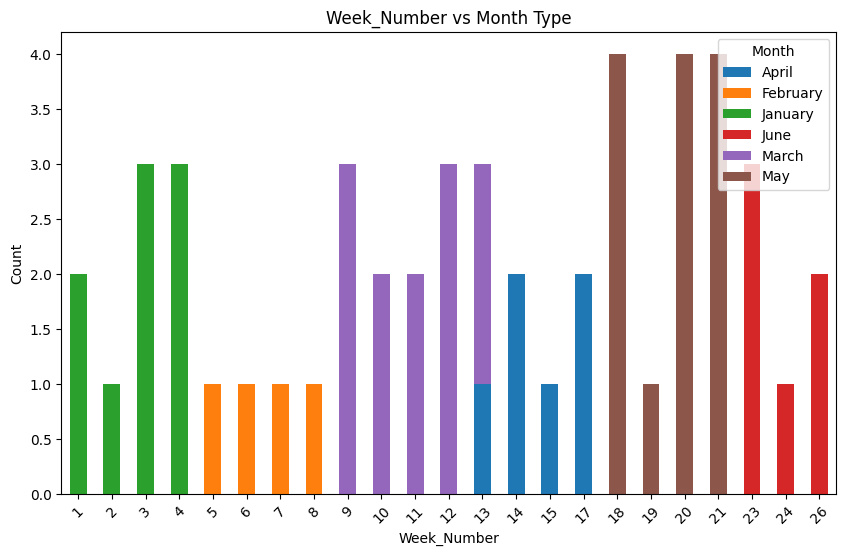

Chi2: 241.66666666666669, p-value: 7.075329104628042e-12


In [9]:
# 3. Contingency Table and Stacked Bar Chart
#print(categorical_eda.contingency_table('Country', 'Requester_Type'))
categorical_eda.plot_stacked_bar_chart('Week_Number', 'Month', title='Week_Number vs Month Type')

# 4. Chi-Squared Test for association
chi2, p, dof, ex = categorical_eda.chi_squared_test('Week_Number', 'Month')
print(f"Chi2: {chi2}, p-value: {p}")


In [10]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from openai import OpenAI
client = OpenAI()
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "write a haiku about ai"}
    ]
)


In [11]:
# Initialize the OpenAIEmbedding and EmbeddingProcessor
embedding_model = OpenAIEmbedding()
processor = EmbeddingProcessor(df, text_columns=["Question", "Answer/Solution"], embedding_model=embedding_model)

# Generate embeddings
df_with_embeddings = processor.generate_embeddings()

# Show the DataFrame with the generated embeddings
df_with_embeddings.head()

Error while fetching embedding: 

You tried to access openai.Embedding, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error while fetching embedding: 

You tried to access openai.Embedding, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error while 

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer/Solution,Duration,Day_of_Week,Week_Number,Month,Year,Question_embedding,Answer/Solution_embedding
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a...",34620.0,Tuesday,26,June,2023,[],[]
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse...",40590.0,Thursday,23,June,2023,[],[]
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,2023-03-06 04:00:00,2023-04-19 15:00:00,Keytruda is not recommended for use during pre...,64020.0,Monday,10,March,2023,[],[]
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,2023-02-05 10:30:00,2023-03-05 06:00:00,Patients should report any new or worsening sy...,40050.0,Sunday,5,February,2023,[],[]
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,2023-03-14 09:30:00,2023-04-16 18:30:00,"Yes, Keytruda can interact with steroids and c...",48060.0,Tuesday,11,March,2023,[],[]
